# Road Traffic Accident Severity Prediction

### Context

This is a multiclass classification project to classify the severity of road accidents into three categories. This project is based on real-world data, and the dataset is also highly imbalanced. There are three types of injuries in a target variable: minor, severe, and fatal.

Road accidents are the major cause of unnatural deaths around the world. All governments work hard to raise awareness about the rules and regulations that must be followed when driving a vehicle on the road in order to reduce fatalities. Thus, it is necessary to have a mechanism that predicts the severity of such accidents and helps in reducing fatalities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Soundarya A I\Downloads\RTA Dataset.csv\RTA Dataset.csv")

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.shape

(12316, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [7]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

### Checking for duplicates

In [8]:
df[df.duplicated()]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity


There are no duplicates

### Checking for null values

In [9]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [10]:
#dropping columns which has more than 2500 missing values and Time column
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'], axis = 1, inplace = True)
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [11]:
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)

The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [12]:
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [14]:
df.Accident_severity.value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

In [15]:
df.Accident_severity.value_counts(normalize=True)*100

Accident_severity
Slight Injury     84.564794
Serious Injury    14.152322
Fatal injury       1.282884
Name: proportion, dtype: float64

<Axes: xlabel='Accident_severity'>

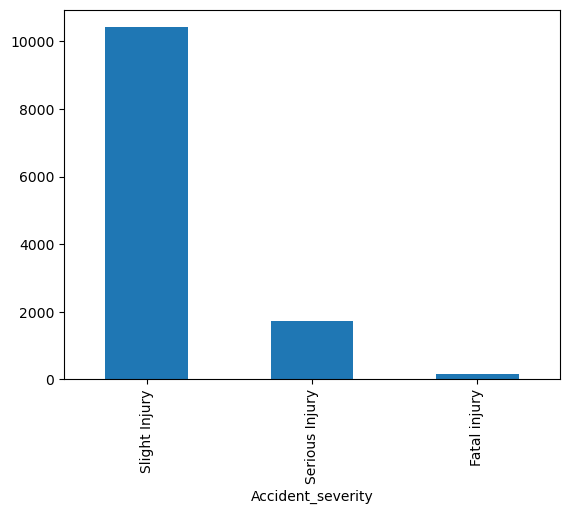

In [16]:
df['Accident_severity'].value_counts().plot(kind='bar')

The target variable classes are highly imbalanced, and we will solve this problem during the data preparation stage to develop accurate and generalized machine learning models.

## Data Visualization

In [17]:
df.head(2)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


### Day_of_week vs Accident_severity

In [18]:
df.Day_of_week.value_counts()

Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64

In [19]:
df.groupby('Day_of_week').Accident_severity.value_counts()

Day_of_week  Accident_severity
Friday       Slight Injury        1712
             Serious Injury        313
             Fatal injury           16
Monday       Slight Injury        1465
             Serious Injury        204
             Fatal injury           12
Saturday     Slight Injury        1384
             Serious Injury        245
             Fatal injury           37
Sunday       Slight Injury        1242
             Serious Injury        190
             Fatal injury           35
Thursday     Slight Injury        1557
             Serious Injury        272
             Fatal injury           22
Tuesday      Slight Injury        1496
             Serious Injury        257
             Fatal injury           17
Wednesday    Slight Injury        1559
             Serious Injury        262
             Fatal injury           19
Name: count, dtype: int64

<Axes: xlabel='Day_of_week', ylabel='count'>

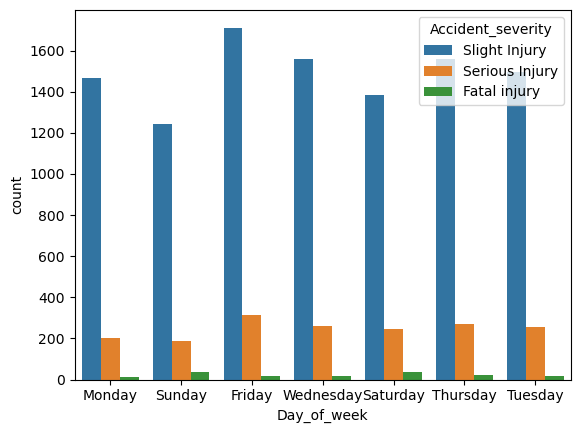

In [20]:
sns.countplot(x='Day_of_week',hue='Accident_severity',data=df)

The majority of accidents result in slight injuries across all days of the week.

Friday shows the highest number of slight injuries, indicating a higher frequency of accidents. This might be due to increased traffic from people preparing for the weekend.

### Age_band_of_driver vs Accident_severity

In [21]:
df.Age_band_of_driver.value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [22]:
df.groupby('Age_band_of_driver').Accident_severity.value_counts()

Age_band_of_driver  Accident_severity
18-30               Slight Injury        3605
                    Serious Injury        604
                    Fatal injury           62
31-50               Slight Injury        3492
                    Serious Injury        541
                    Fatal injury           54
Over 51             Slight Injury        1304
                    Serious Injury        257
                    Fatal injury           24
Under 18            Slight Injury         644
                    Serious Injury        169
                    Fatal injury           12
Unknown             Slight Injury        1370
                    Serious Injury        172
                    Fatal injury            6
Name: count, dtype: int64

<Axes: xlabel='Age_band_of_driver', ylabel='count'>

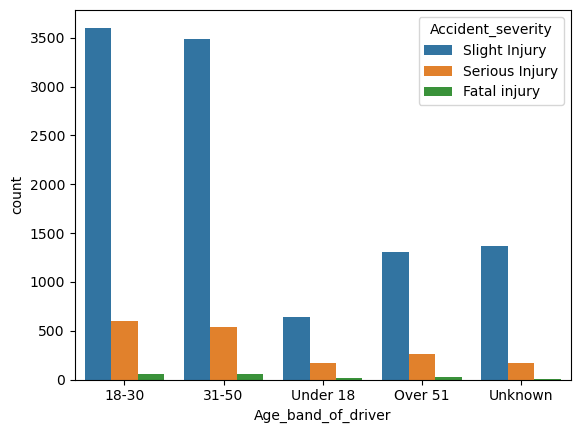

In [23]:
sns.countplot(x='Age_band_of_driver',hue='Accident_severity',data=df)

Younger drivers (18-30) might be more prone to risky driving behaviors, such as speeding and distracted driving, which could explain the high number of slight and serious injuries.

Middle-aged drivers (31-50) might have high exposure due to more frequent driving for work and family activities.

### Sex_of_driver vs Accident_severity

In [24]:
df.Sex_of_driver.value_counts()

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

In [25]:
df.groupby('Sex_of_driver').Accident_severity.value_counts()

Sex_of_driver  Accident_severity
Female         Slight Injury         592
               Serious Injury        104
               Fatal injury            5
Male           Slight Injury        9664
               Serious Injury       1621
               Fatal injury          152
Unknown        Slight Injury         159
               Serious Injury         18
               Fatal injury            1
Name: count, dtype: int64

<Axes: xlabel='Sex_of_driver', ylabel='count'>

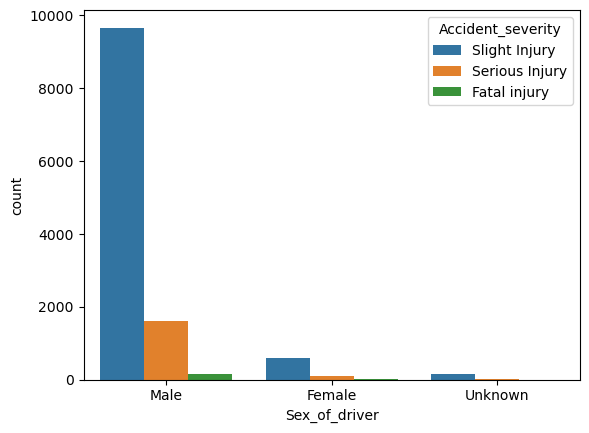

In [26]:
sns.countplot(x='Sex_of_driver',hue='Accident_severity',data=df)

There is a significantly higher number of accidents involving male drivers compared to female drivers. 

Higher exposure (i.e., driving more frequently or for longer distances) and risk-taking behaviors such as speeding and aggressive driving might contribute to the higher number of accidents.
 
Generally, female drivers are often observed to engage in less risky driving behaviors compared to male drivers, which may explain the lower accident counts.


### Educational_level vs Accident_severity

In [27]:
df.Educational_level.value_counts()

Educational_level
Junior high school    8360
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

In [28]:
df.groupby('Educational_level').Accident_severity.value_counts()

Educational_level   Accident_severity
Above high school   Slight Injury         304
                    Serious Injury         53
                    Fatal injury            5
Elementary school   Slight Injury        1825
                    Serious Injury        314
                    Fatal injury           24
High school         Slight Injury         949
                    Serious Injury        146
                    Fatal injury           15
Illiterate          Slight Injury          39
                    Serious Injury          6
Junior high school  Slight Injury        7067
                    Serious Injury       1182
                    Fatal injury          111
Unknown             Slight Injury          80
                    Serious Injury         20
Writing & reading   Slight Injury         151
                    Serious Injury         22
                    Fatal injury            3
Name: count, dtype: int64

Text(0, 0.5, '')

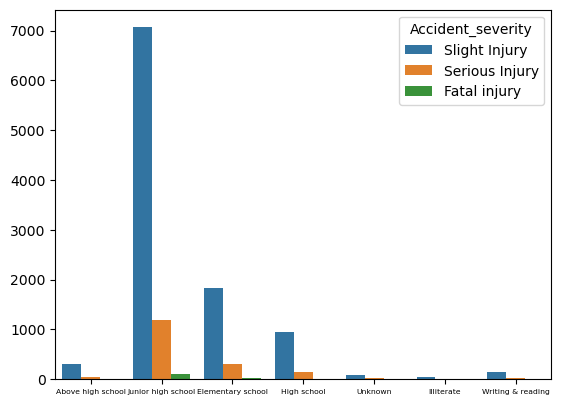

In [29]:
sns.countplot(x='Educational_level',hue='Accident_severity',data=df)
plt.xticks(fontsize=5.5)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('')

The data suggests that individuals with a junior high school education are the most involved in traffic accidents, particularly those resulting in slight injuries.

Education level appears to have a strong correlation with the frequency and severity of traffic accidents, with less educated individuals generally experiencing more accidents.

In [30]:
df.head(1)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury


### Vehicle_driver_relation vs Accident_severity

In [31]:
df.Vehicle_driver_relation.value_counts()

Vehicle_driver_relation
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: count, dtype: int64

In [32]:
df.groupby('Vehicle_driver_relation').Accident_severity.value_counts()

Vehicle_driver_relation  Accident_severity
Employee                 Slight Injury        8642
                         Serious Injury       1441
                         Fatal injury          123
Other                    Slight Injury         108
                         Serious Injury         14
                         Fatal injury            1
Owner                    Slight Injury        1652
                         Serious Injury        287
                         Fatal injury           34
Unknown                  Slight Injury          13
                         Serious Injury          1
Name: count, dtype: int64

<Axes: xlabel='Vehicle_driver_relation', ylabel='count'>

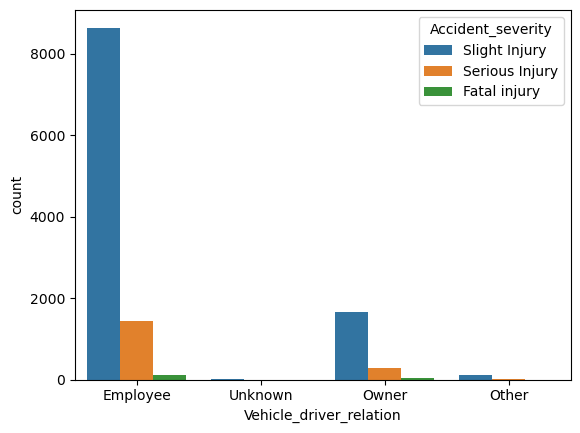

In [33]:
sns.countplot(x='Vehicle_driver_relation',hue='Accident_severity',data=df)

The data indicates that employees, likely those who drive vehicles for work purposes, are at a higher risk of being involved in accidents, particularly resulting in slight injuries.

Safety interventions and training programs for employee drivers could potentially reduce the high incidence of accidents in this category.

### Driving_experience vs Accident_severity

In [34]:
df.Driving_experience.value_counts()

Driving_experience
5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

In [35]:
df.groupby('Driving_experience').Accident_severity.value_counts()

Driving_experience  Accident_severity
1-2yr               Slight Injury        1507
                    Serious Injury        228
                    Fatal injury           21
2-5yr               Slight Injury        2186
                    Serious Injury        381
                    Fatal injury           46
5-10yr              Slight Injury        3553
                    Serious Injury        585
                    Fatal injury           54
Above 10yr          Slight Injury        1910
                    Serious Injury        323
                    Fatal injury           29
Below 1yr           Slight Injury        1128
                    Serious Injury        207
                    Fatal injury            7
No Licence          Slight Injury         105
                    Serious Injury         13
unknown             Slight Injury          26
                    Serious Injury          6
                    Fatal injury            1
Name: count, dtype: int64

<Axes: xlabel='Driving_experience', ylabel='count'>

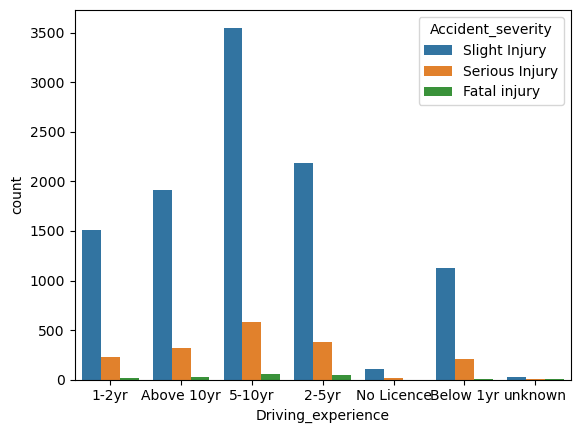

In [36]:
sns.countplot(x='Driving_experience',hue='Accident_severity',data=df)

Overall, drivers with 5-10 years of experience have the highest counts across all severity levels

### Type_of_vehicle vs Accident_severity

In [37]:
df.Type_of_vehicle.value_counts()

Type_of_vehicle
Automobile              4155
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [38]:
df.groupby('Type_of_vehicle').Accident_severity.value_counts()

Type_of_vehicle       Accident_severity
Automobile            Slight Injury        3516
                      Serious Injury        588
                      Fatal injury           51
Bajaj                 Slight Injury          26
                      Serious Injury          3
Bicycle               Slight Injury          20
                      Serious Injury          1
Long lorry            Slight Injury         312
                      Serious Injury         67
                      Fatal injury            4
Lorry (11?40Q)        Slight Injury         435
                      Serious Injury         99
                      Fatal injury            7
Lorry (41?100Q)       Slight Injury        1880
                      Serious Injury        280
                      Fatal injury           26
Motorcycle            Slight Injury         145
                      Serious Injury         29
                      Fatal injury            3
Other                 Slight Injury        1054


Text(0, 0.5, '')

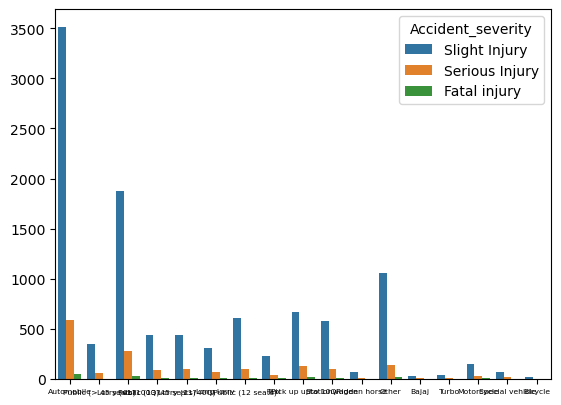

In [39]:
sns.countplot(x='Type_of_vehicle',hue='Accident_severity',data=df)
plt.xticks(fontsize=5.5)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('')

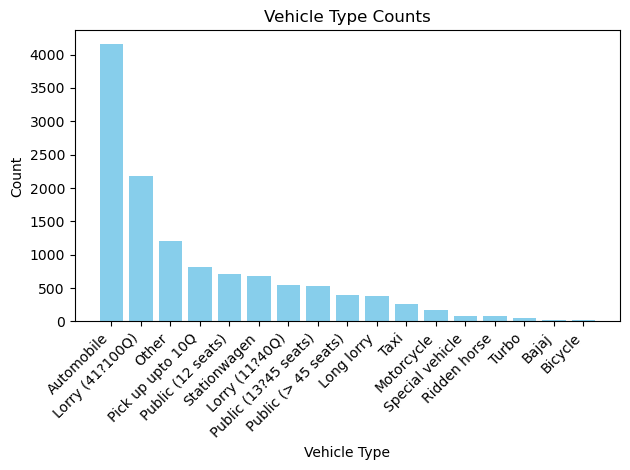

In [40]:
import matplotlib.pyplot as plt

# Data
categories = ['Automobile', 'Lorry (41?100Q)', 'Other', 'Pick up upto 10Q', 'Public (12 seats)', 
              'Stationwagen', 'Lorry (11?40Q)', 'Public (13?45 seats)', 'Public (> 45 seats)', 
              'Long lorry', 'Taxi', 'Motorcycle', 'Special vehicle', 'Ridden horse', 'Turbo', 
              'Bajaj', 'Bicycle']
counts = [4155, 2186, 1208, 811, 711, 687, 541, 532, 404, 383, 265, 177, 84, 76, 46, 29, 21]

# Plotting
fig, ax = plt.subplots()

ax.bar(categories, counts, color='skyblue')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adding labels and title
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Count')
ax.set_title('Vehicle Type Counts')

# Display plot
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()


Automobiles have the highest count of accidents followed by lorry and bicycles have least count of accidents

### Road_surface_type vs Accident_severity

In [41]:
df.Road_surface_type.value_counts()

Road_surface_type
Asphalt roads                       11468
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64

In [42]:
df.groupby('Road_surface_type').Accident_severity.value_counts()

Road_surface_type                 Accident_severity
Asphalt roads                     Slight Injury        9703
                                  Serious Injury       1616
                                  Fatal injury          149
Asphalt roads with some distress  Slight Injury          73
                                  Serious Injury          7
                                  Fatal injury            1
Earth roads                       Slight Injury         302
                                  Serious Injury         49
                                  Fatal injury            7
Gravel roads                      Slight Injury         197
                                  Serious Injury         45
Other                             Slight Injury         140
                                  Serious Injury         26
                                  Fatal injury            1
Name: count, dtype: int64

Text(0, 0.5, '')

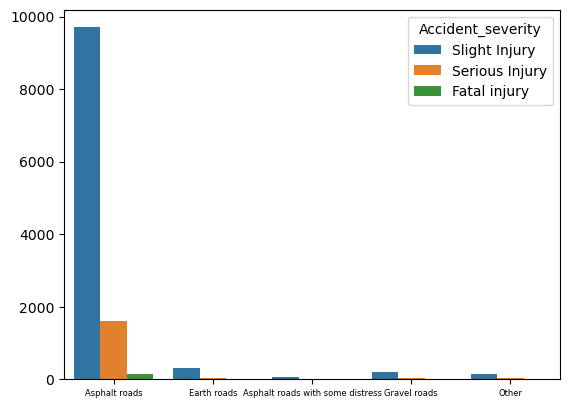

In [43]:
sns.countplot(x='Road_surface_type',hue='Accident_severity',data=df)
plt.xticks(fontsize=6)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('')

High Incident Rate on Asphalt Roads: Asphalt roads see the highest number of accidents across all severity levels, which could be due to their prevalence and higher traffic volumes.
    
Low Incident Rate on Non-Asphalt Roads: Non-asphalt roads (earth, distressed asphalt, gravel) have significantly fewer accidents, possibly due to lower traffic volumes or lesser usage.

### Road_surface_conditions vs Accident_severity

In [44]:
df.Road_surface_conditions.value_counts()

Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64

In [45]:
df.groupby('Road_surface_conditions').Accident_severity.value_counts()

Road_surface_conditions  Accident_severity
Dry                      Slight Injury        7887
                         Serious Injury       1332
                         Fatal injury          121
Flood over 3cm. deep     Slight Injury           2
Snow                     Slight Injury          66
                         Serious Injury          4
Wet or damp              Slight Injury        2460
                         Serious Injury        407
                         Fatal injury           37
Name: count, dtype: int64

<Axes: xlabel='Road_surface_conditions', ylabel='count'>

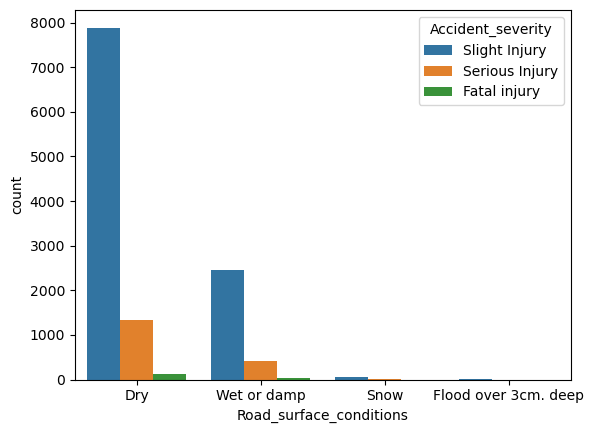

In [46]:
sns.countplot(x='Road_surface_conditions',hue='Accident_severity',data=df)

High Incident Rate on Dry Roads: Most accidents, across all severity levels, occur on dry roads, possibly due to higher traffic volumes under such conditions.
    
Moderate Incident Rate on Wet or Damp Roads: Wet or damp roads have a noticeable number of accidents, though significantly fewer than dry roads.
    
Low Incident Rate on Snow and Flooded Roads: Snow and flooded road conditions have very low counts for all types of injuries, suggesting fewer vehicles operate under such conditions or better precautions are taken.

### Light_conditions vs Accident_severity

In [47]:
df.Light_conditions.value_counts()

Light_conditions
Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: count, dtype: int64

In [48]:
df.groupby('Light_conditions').Accident_severity.value_counts()

Light_conditions         Accident_severity
Darkness - lights lit    Slight Injury        2755
                         Serious Injury        465
                         Fatal injury           66
Darkness - lights unlit  Slight Injury          33
                         Serious Injury          7
Darkness - no lighting   Slight Injury         138
                         Serious Injury         49
                         Fatal injury            5
Daylight                 Slight Injury        7489
                         Serious Injury       1222
                         Fatal injury           87
Name: count, dtype: int64

Text(0, 0.5, '')

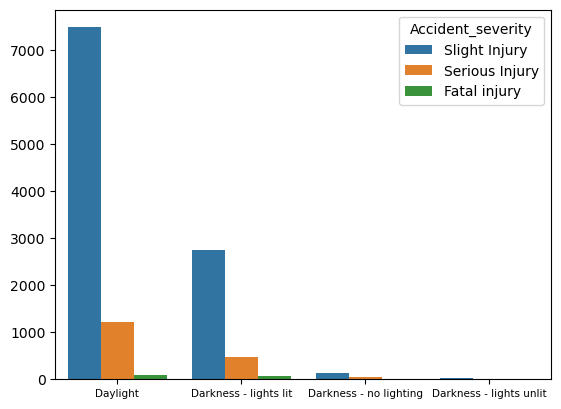

In [49]:
sns.countplot(x='Light_conditions',hue='Accident_severity',data=df)
plt.xticks(fontsize=7.5)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('')

The majority of accidents occur in daylight, with a significant number of these being slight injuries. This could be attributed to higher traffic volumes and activity during the day.

Lights Lit: This category shows the second highest number of accidents, with slight injuries still being the most common, followed by serious injuries, and very few fatal injuries.
    
No Lighting: Accidents are much less frequent, with slight injuries being the most common, but with a noticeable proportion of serious injuries.
    
Lights Unlit: This condition has the fewest accidents across all severities, indicating it's relatively uncommon or less reported.
    
Overall, these insights indicate that while most accidents occur in daylight, the risk of severe injury increases in low-light conditions, emphasizing the importance of proper lighting and cautious driving during nighttime or poorly lit conditions.    

In [50]:
pd.set_option('display.max_columns', None)
df.head(1)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury


### Type_of_collision vs Accident_severity

In [51]:
df.Type_of_collision.value_counts()

Type_of_collision
Vehicle with vehicle collision             8929
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [52]:
df.groupby('Type_of_collision').Accident_severity.value_counts()

Type_of_collision                        Accident_severity
Collision with animals                   Slight Injury         142
                                         Serious Injury         27
                                         Fatal injury            2
Collision with pedestrians               Slight Injury         733
                                         Serious Injury        141
                                         Fatal injury           22
Collision with roadside objects          Slight Injury        1490
                                         Serious Injury        272
                                         Fatal injury           24
Collision with roadside-parked vehicles  Slight Injury          49
                                         Serious Injury          5
Fall from vehicles                       Slight Injury          30
                                         Serious Injury          4
Other                                    Slight Injury          23
   

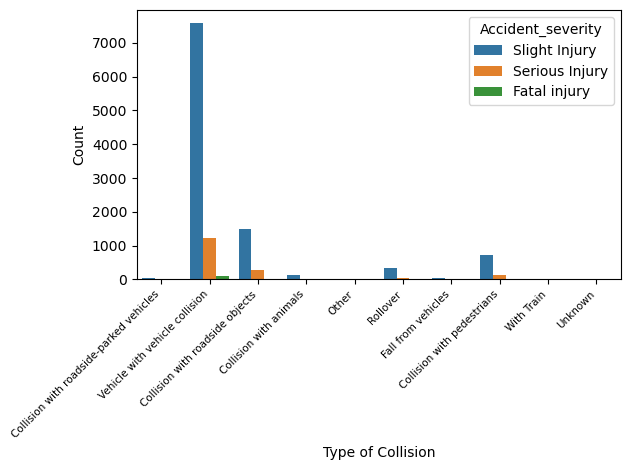

In [53]:
sns.countplot(x='Type_of_collision', hue='Accident_severity', data=df)
plt.xticks(rotation=45, ha='right', fontsize=7.5)  
plt.yticks(fontsize=10)
plt.xlabel('Type of Collision')
plt.ylabel('Count')
plt.tight_layout()  
plt.show()

Vehicle with Vehicle Collision: This is by far the most common type of collision, with the highest counts across all severity levels, especially for slight injuries. This suggests that most road accidents involve collisions between moving vehicles.
    
This is the second most common collision type, with a notable number of slight injuries and some serious injuries. This indicates a significant risk when vehicles veer off the road or hit objects near the roadside.

The high frequency of vehicle-to-vehicle collisions suggests a need for interventions aimed at preventing these types of accidents, such as improving driver awareness, enforcing traffic laws, and enhancing vehicle safety features. Additionally, measures to protect vulnerable road users, such as pedestrians, are crucial given the higher severity of these collisions.

### Cause_of_accident vs Accident_severity

In [54]:
df.Cause_of_accident.value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: count, dtype: int64

In [55]:
df.groupby('Cause_of_accident').Accident_severity.value_counts()

Cause_of_accident                     Accident_severity
Changing lane to the left             Slight Injury        1251
                                      Serious Injury        206
                                      Fatal injury           16
Changing lane to the right            Slight Injury        1525
                                      Serious Injury        260
                                      Fatal injury           23
Driving at high speed                 Slight Injury         141
                                      Serious Injury         31
                                      Fatal injury            2
Driving carelessly                    Slight Injury        1171
                                      Serious Injury        209
                                      Fatal injury           22
Driving to the left                   Slight Injury         227
                                      Serious Injury         53
                                      Fatal inju

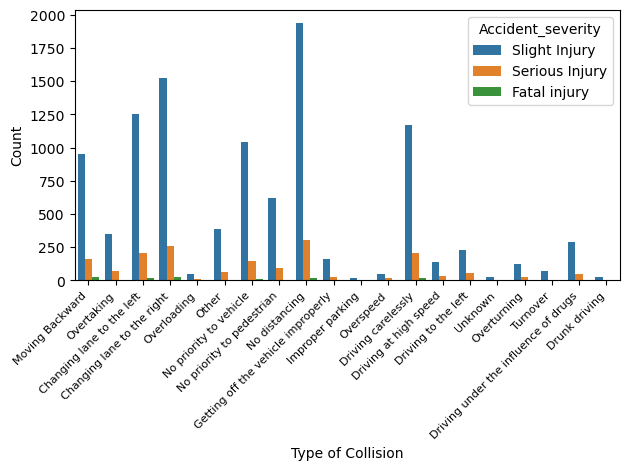

In [56]:
sns.countplot(x='Cause_of_accident', hue='Accident_severity', data=df)
plt.xticks(rotation=45, ha='right', fontsize=8)  
plt.yticks(fontsize=10)
plt.xlabel('Type of Collision')
plt.ylabel('Count')
plt.tight_layout()  
plt.show()

High Frequency, Low Severity: Factors like overloading, driving carelessly, and driving too close occur frequently but typically result in slight injuries. These may be due to minor infractions or situations where drivers can partially control the outcome.

Low Frequency, High Severity: Factors such as drunk driving, driving under the influence of drugs, and overturning, while less frequent, tend to result in more serious and fatal injuries. These behaviors are inherently more dangerous and often lead to more severe accidents.

In [57]:
numeric_df = df.select_dtypes(include=[float, int])

In [58]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


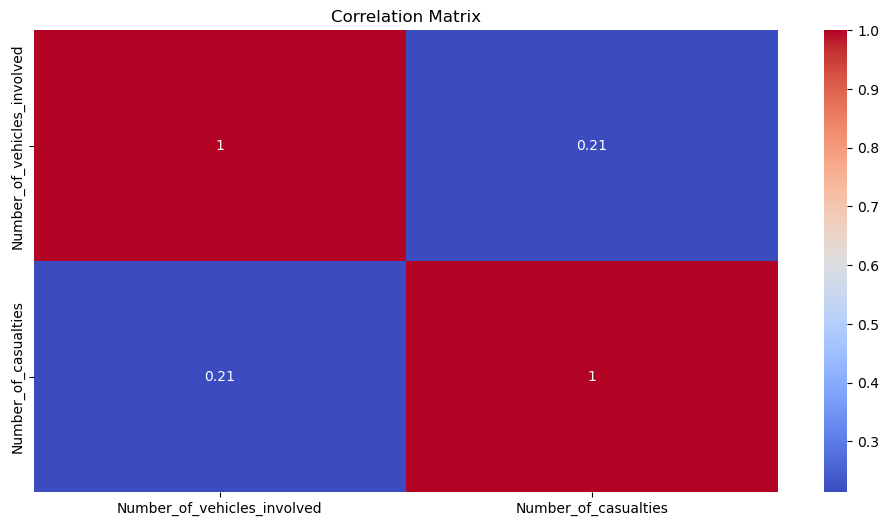

                             Number_of_vehicles_involved  Number_of_casualties
Number_of_vehicles_involved                     1.000000              0.213427
Number_of_casualties                            0.213427              1.000000


In [59]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

In [60]:
categorical

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

Featuer Name = Number_of_vehicles_involved


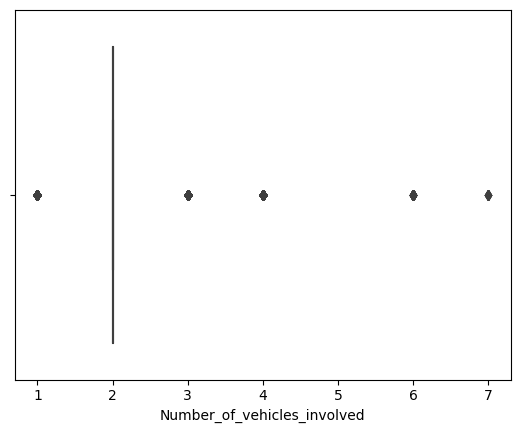

count    12316.000000
mean         2.040679
std          0.688790
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: Number_of_vehicles_involved, dtype: float64

Featuer Name = Number_of_casualties


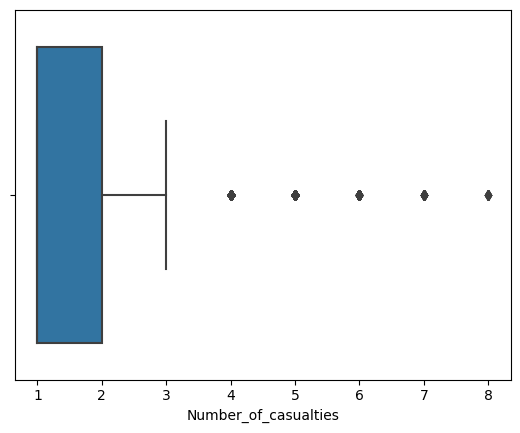

count    12316.000000
mean         1.548149
std          1.007179
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Number_of_casualties, dtype: float64

In [61]:
num_cols = ['Number_of_vehicles_involved','Number_of_casualties']

for i in num_cols:
    print(f'Featuer Name = {i}')
    sns.boxplot(x = df[i])
    plt.show()
    display(df[i].describe())

### Encoding

In [62]:
df1 = pd.get_dummies(df,drop_first=True).astype(int)

In [63]:
df1.head()

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_unknown,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,Type_of_vehicle_Long lorry,Type_of_vehicle_Lorry (11?40Q),Type_of_vehicle_Lorry (41?100Q),Type_of_vehicle_Motorcycle,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public (12 seats),Type_of_vehicle_Public (13?45 seats),Type_of_vehicle_Public (> 45 seats),Type_of_vehicle_Ridden horse,Type_of_vehicle_Special vehicle,Type_of_vehicle_Stationwagen,Type_of_vehicle_Taxi,Type_of_vehicle_Turbo,Owner_of_vehicle_Organization,Owner_of_vehicle_Other,Owner_of_vehicle_Owner,Area_accident_occured_ Recreational areas,Area_accident_occured_ Church areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Industrial areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Office areas,Area_accident_occured_Other,Area_accident_occured_Recreational areas,Area_accident_occured_Residential areas,Area_accident_occured_Rural village areas,Area_accident_occured_Rural village areasOffice areas,Area_accident_occured_School areas,Area_accident_occured_Unknown,Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other,Road_allignment_Gentle horizontal curve,Road_allignment_Sharp reverse curve,Road_allignment_Steep grade downward with mountainous terrain,Road_allignment_Steep grade upward with mountainous terrain,Road_allignment_Tangent road with flat terrain,Road_allignment_Tangent road with mild grade and flat terrain,Road_allignment_Tangent road with mountainous terrain and,Road_allignment_Tangent road with rolling terrain,Types_of_Junction_No junction,Types_of_Junction_O Shape,Types_of_Junction_Other,Types_of_Junction_T Shape,Types_of_Junction_Unknown,Types_of_Junction_X Shape,Types_of_Junction_Y Shape,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Earth roads,Road_surface_type_Gravel roads,Road_surface_type_Other,Road_surface_conditions_Flood over 3cm. deep,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Light_conditions_Darkness - lights unlit,Light_conditions_Darkness - no lighting,Light_conditions_Daylight,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Type_of_collision_Collision with pedestrians,Type_of_collision_Collision with roadside objects,Type_of_collision_Collision with roadside-parked vehicles,Type_of_collision_Fall from vehicles,Type_of_collision_Other,Type_of_collision_Rollover,Type_of_collision_Unknown,Type_of_collision_Vehicle with vehicle collision,Type_of_collision_With Train,Vehicle_movement_Getting off,Vehicle_movement_Going straight,Vehicle_movement_Moving Backward,Vehicle_movement_Other,Vehicle_movement_Overtaking,Vehicle_movement_Parked,Vehicle_movement_Reversing,Vehicle_movement_Stopping,Vehicle_movement_Turnover,Vehicle_movement_U-Turn,Vehicle_movement_Unknown,Vehicle_movement_Waiting to go,Casualty_class_Passenger,Casualty_class_Pedestrian,Casualty_class_na,Sex_of_casualty_Male,Sex_of_casual

In [64]:
df1.shape

(12316, 163)

In [72]:
print(df1.columns)

Index(['Number_of_vehicles_involved', 'Number_of_casualties',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'Age_band_of_driver_31-50', 'Age_band_of_driver_Over 51',
       ...
       'Cause_of_accident_No priority to vehicle', 'Cause_of_accident_Other',
       'Cause_of_accident_Overloading', 'Cause_of_accident_Overspeed',
       'Cause_of_accident_Overtaking', 'Cause_of_accident_Overturning',
       'Cause_of_accident_Turnover', 'Cause_of_accident_Unknown',
       'Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'],
      dtype='object', length=163)


In [75]:
# Use a list to specify the columns to drop
X = df1.drop(['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'], axis=1)

# Assuming you want to create a target variable 'y' that combines the two columns
y = df1[['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury']]


### Feature selection using chi-square

In [76]:
# feature seleciton method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(df1, y)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)

In [77]:
y

,Accident_severity_Serious Injury,Accident_severity_Slight Injury
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
12311,0,1
12312,0,1
12313,1,0
12314,0,1


In [97]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Assuming encoded_df is a DataFrame and y_en is your target variable
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(X, y)

# Take the selected features
cols = X.columns[fs.get_support()]

# Convert selected features into a DataFrame
fs_df = pd.DataFrame(X_new, columns=cols)


We are selecting the top 50 features out of 106 features from the encoded dataframe and storing them in a new dataframe object called “fs_df.” The “Chi2” statistic is used when the target feature is a categorical variable

### Imbalance data treatment using the ‘SMOTE’ technique

In [103]:
# importing the SMOTENC object from imblearn library 
from imblearn.over_sampling import SMOTENC

# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(3,50))

# creating smote object with SMOTENC class
smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y)

# print the shape of new upsampled dataset
X_n.shape, y_n.shape

((20830, 50), (20830,))

In [104]:
print(y_n.value_counts())

Accident_severity_Slight Injury     10415
Accident_severity_Serious Injury    10415
Name: count, dtype: int64


As you can see now, we have an upsampled new dataset with a total of 31245 samples. Each of our target classes has 10415 samples, and the dataset is now balanced for modeling tasks.

### Spliting dependent and independent labels

In [105]:
X.head()

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_unknown,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,Type_of_vehicle_Long lorry,Type_of_vehicle_Lorry (11?40Q),Type_of_vehicle_Lorry (41?100Q),Type_of_vehicle_Motorcycle,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public (12 seats),Type_of_vehicle_Public (13?45 seats),Type_of_vehicle_Public (> 45 seats),Type_of_vehicle_Ridden horse,Type_of_vehicle_Special vehicle,Type_of_vehicle_Stationwagen,Type_of_vehicle_Taxi,Type_of_vehicle_Turbo,Owner_of_vehicle_Organization,Owner_of_vehicle_Other,Owner_of_vehicle_Owner,Area_accident_occured_ Recreational areas,Area_accident_occured_ Church areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Industrial areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Office areas,Area_accident_occured_Other,Area_accident_occured_Recreational areas,Area_accident_occured_Residential areas,Area_accident_occured_Rural village areas,Area_accident_occured_Rural village areasOffice areas,Area_accident_occured_School areas,Area_accident_occured_Unknown,Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other,Road_allignment_Gentle horizontal curve,Road_allignment_Sharp reverse curve,Road_allignment_Steep grade downward with mountainous terrain,Road_allignment_Steep grade upward with mountainous terrain,Road_allignment_Tangent road with flat terrain,Road_allignment_Tangent road with mild grade and flat terrain,Road_allignment_Tangent road with mountainous terrain and,Road_allignment_Tangent road with rolling terrain,Types_of_Junction_No junction,Types_of_Junction_O Shape,Types_of_Junction_Other,Types_of_Junction_T Shape,Types_of_Junction_Unknown,Types_of_Junction_X Shape,Types_of_Junction_Y Shape,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Earth roads,Road_surface_type_Gravel roads,Road_surface_type_Other,Road_surface_conditions_Flood over 3cm. deep,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Light_conditions_Darkness - lights unlit,Light_conditions_Darkness - no lighting,Light_conditions_Daylight,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Type_of_collision_Collision with pedestrians,Type_of_collision_Collision with roadside objects,Type_of_collision_Collision with roadside-parked vehicles,Type_of_collision_Fall from vehicles,Type_of_collision_Other,Type_of_collision_Rollover,Type_of_collision_Unknown,Type_of_collision_Vehicle with vehicle collision,Type_of_collision_With Train,Vehicle_movement_Getting off,Vehicle_movement_Going straight,Vehicle_movement_Moving Backward,Vehicle_movement_Other,Vehicle_movement_Overtaking,Vehicle_movement_Parked,Vehicle_movement_Reversing,Vehicle_movement_Stopping,Vehicle_movement_Turnover,Vehicle_movement_U-Turn,Vehicle_movement_Unknown,Vehicle_movement_Waiting to go,Casualty_class_Passenger,Casualty_class_Pedestrian,Casualty_class_na,Sex_of_casualty_Male,Sex_of_casual

In [106]:
y.tail()

12311     Accident_severity_Slight Injury
12312     Accident_severity_Slight Injury
12313    Accident_severity_Serious Injury
12314     Accident_severity_Slight Injury
12315     Accident_severity_Slight Injury
dtype: object

In [109]:
X_n

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Monday,Day_of_week_Saturday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Unknown,Driving_experience_No Licence,Type_of_vehicle_Bicycle,Type_of_vehicle_Long lorry,Type_of_vehicle_Lorry (11?40Q),Type_of_vehicle_Lorry (41?100Q),Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public (13?45 seats),Type_of_vehicle_Special vehicle,Owner_of_vehicle_Other,Area_accident_occured_ Hospital areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Recreational areas,Area_accident_occured_Residential areas,Area_accident_occured_Rural village areas,Area_accident_occured_Rural village areasOffice areas,Road_allignment_Steep grade upward with mountainous terrain,Types_of_Junction_No junction,Types_of_Junction_Other,Types_of_Junction_X Shape,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Gravel roads,Road_surface_conditions_Snow,Light_conditions_Darkness - no lighting,Light_conditions_Daylight,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Type_of_collision_Collision with pedestrians,Type_of_collision_Collision with roadside objects,Sex_of_casualty_Male,Age_band_of_casualty_5,Age_band_of_casualty_Under 18,"Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",Cause_of_accident_Driving to the left,Cause_of_accident_No distancing,Cause_of_accident_No priority to vehicle,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking
0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20825,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,0,1,1
20826,3,2,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,0,0,1,0
20827,2,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
20828,2,1,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,1,0,1,1


In [110]:
y_n

0         Accident_severity_Slight Injury
1         Accident_severity_Slight Injury
2        Accident_severity_Serious Injury
3         Accident_severity_Slight Injury
4         Accident_severity_Slight Injury
                       ...               
20825    Accident_severity_Serious Injury
20826    Accident_severity_Serious Injury
20827    Accident_severity_Serious Injury
20828    Accident_severity_Serious Injury
20829    Accident_severity_Serious Injury
Length: 20830, dtype: object

### Model Building

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_n,y_n,test_size=0.2,random_state =1)

In [114]:
print("Training X shape:", X_train.shape)
print("Testing X shape:", X_test.shape)
print("Training y shape:", y_train.shape)
print("Testing y shape:", y_test.shape)

Training X shape: (16664, 50)
Testing X shape: (4166, 50)
Training y shape: (16664,)
Testing y shape: (4166,)


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Define the models
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "GNB": GaussianNB(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}


In [117]:
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result

In [118]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [119]:
def bestParams(model,param,xtrain,ytrain):
    #cv
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(xtrain,ytrain)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [120]:
bestParams

<function __main__.bestParams(model, param, xtrain, ytrain)>

In [125]:
acc=modelAccuracy(models,X_n,y_n,1)

LogisticRegression: Accuracy = 0.9092
DecisionTreeClassifier: Accuracy = 0.9718
SVM: Accuracy = 0.9087
KNeighborsClassifier: Accuracy = 0.9040
GNB: Accuracy = 0.8916
RandomForestClassifier: Accuracy = 0.9718
AdaBoostClassifier: Accuracy = 0.9076
GradientBoostingClassifier: Accuracy = 0.9105


In [126]:
bestModel(acc)

Best Model is  DecisionTreeClassifier  with accuaracy => 0.97177148343735


# Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [142]:
model.fit(X_train,y_train)

LogisticRegression()

In [143]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [144]:
model.predict_proba(X_train)

array([[9.99831047e-01, 1.68952633e-04],
       [9.99951535e-01, 4.84645637e-05],
       [1.57585092e-01, 8.42414908e-01],
       ...,
       [4.05274668e-01, 5.94725332e-01],
       [2.39180208e-01, 7.60819792e-01],
       [1.60457563e-01, 8.39542437e-01]])

In [145]:
pd.DataFrame(model.predict_proba(X_train))

,0,1
0,0.999831,0.000169
1,0.999952,0.000048
2,0.157585,0.842415
3,0.145489,0.854511
4,0.137551,0.862449
...,...,...
16659,0.114604,0.885396
16660,0.999959,0.000041
16661,0.405275,0.594725
16662,0.239180,0.760820


In [146]:
model.predict_proba(X_test)

array([[9.99856141e-01, 1.43859190e-04],
       [1.14246920e-01, 8.85753080e-01],
       [2.61232755e-01, 7.38767245e-01],
       ...,
       [1.08933984e-01, 8.91066016e-01],
       [4.01499508e-02, 9.59850049e-01],
       [1.00833498e-01, 8.99166502e-01]])

In [147]:
pd.DataFrame(model.predict_proba(X_test))

,0,1
0,0.999856,0.000144
1,0.114247,0.885753
2,0.261233,0.738767
3,0.125206,0.874794
4,0.255117,0.744883
...,...,...
4161,0.065706,0.934294
4162,0.999354,0.000646
4163,0.108934,0.891066
4164,0.040150,0.959850


In [148]:
y_train_pred

array(['Accident_severity_Serious Injury',
       'Accident_severity_Serious Injury',
       'Accident_severity_Slight Injury', ...,
       'Accident_severity_Slight Injury',
       'Accident_severity_Slight Injury',
       'Accident_severity_Slight Injury'], dtype=object)

### Accuracy score

In [149]:
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.91, Testing Score 0.91


In [150]:
y_test

17439    Accident_severity_Serious Injury
6549      Accident_severity_Slight Injury
1295     Accident_severity_Serious Injury
7459      Accident_severity_Slight Injury
10946     Accident_severity_Slight Injury
                       ...               
11260     Accident_severity_Slight Injury
15582    Accident_severity_Serious Injury
2482      Accident_severity_Slight Injury
7717      Accident_severity_Slight Injury
3496      Accident_severity_Slight Injury
Length: 4166, dtype: object

In [151]:
predicted=y_test_pred

In [152]:
compare=pd.DataFrame()

In [153]:
compare['predicted']=predicted

In [154]:
compare['actual']= y_test_pred

In [155]:
compare

,predicted,actual
0,Accident_severity_Serious Injury,Accident_severity_Serious Injury
1,Accident_severity_Slight Injury,Accident_severity_Slight Injury
2,Accident_severity_Slight Injury,Accident_severity_Slight Injury
3,Accident_severity_Slight Injury,Accident_severity_Slight Injury
4,Accident_severity_Slight Injury,Accident_severity_Slight Injury
...,...,...
4161,Accident_severity_Slight Injury,Accident_severity_Slight Injury
4162,Accident_severity_Serious Injury,Accident_severity_Serious Injury
4163,Accident_severity_Slight Injury,Accident_severity_Slight Injury
4164,Accident_severity_Slight Injury,Accident_severity_Slight Injury


In [156]:
pred=y_train_pred

In [157]:
result=pd.DataFrame()

In [158]:
result['pred']=pred

In [159]:
result['actual']=y_train_pred

In [160]:
result

,pred,actual
0,Accident_severity_Serious Injury,Accident_severity_Serious Injury
1,Accident_severity_Serious Injury,Accident_severity_Serious Injury
2,Accident_severity_Slight Injury,Accident_severity_Slight Injury
3,Accident_severity_Slight Injury,Accident_severity_Slight Injury
4,Accident_severity_Slight Injury,Accident_severity_Slight Injury
...,...,...
16659,Accident_severity_Slight Injury,Accident_severity_Slight Injury
16660,Accident_severity_Serious Injury,Accident_severity_Serious Injury
16661,Accident_severity_Slight Injury,Accident_severity_Slight Injury
16662,Accident_severity_Slight Injury,Accident_severity_Slight Injury


In [161]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [162]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[1708,  374],
       [   2, 2082]], dtype=int64)

In [163]:
cm_train = confusion_matrix(y_train,y_train_pred)
cm_train

array([[6832, 1501],
       [  10, 8321]], dtype=int64)

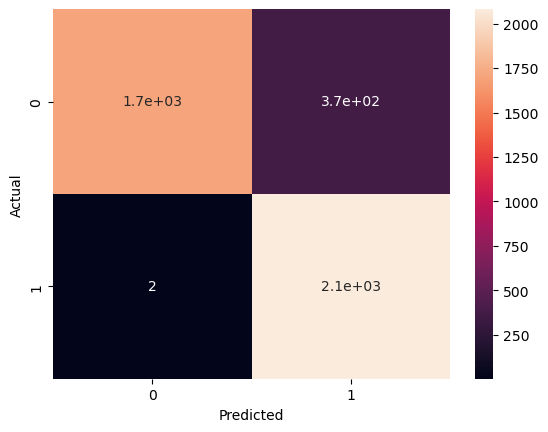

In [164]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

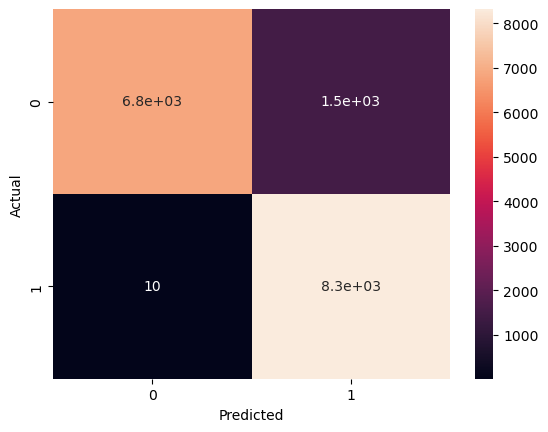

In [165]:
import seaborn as sns
sns.heatmap(cm_train,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [166]:
print(classification_report(y_test,y_test_pred))

                                  precision    recall  f1-score   support

Accident_severity_Serious Injury       1.00      0.82      0.90      2082
 Accident_severity_Slight Injury       0.85      1.00      0.92      2084

                        accuracy                           0.91      4166
                       macro avg       0.92      0.91      0.91      4166
                    weighted avg       0.92      0.91      0.91      4166



In [167]:
print(classification_report(y_train,y_train_pred))

                                  precision    recall  f1-score   support

Accident_severity_Serious Injury       1.00      0.82      0.90      8333
 Accident_severity_Slight Injury       0.85      1.00      0.92      8331

                        accuracy                           0.91     16664
                       macro avg       0.92      0.91      0.91     16664
                    weighted avg       0.92      0.91      0.91     16664



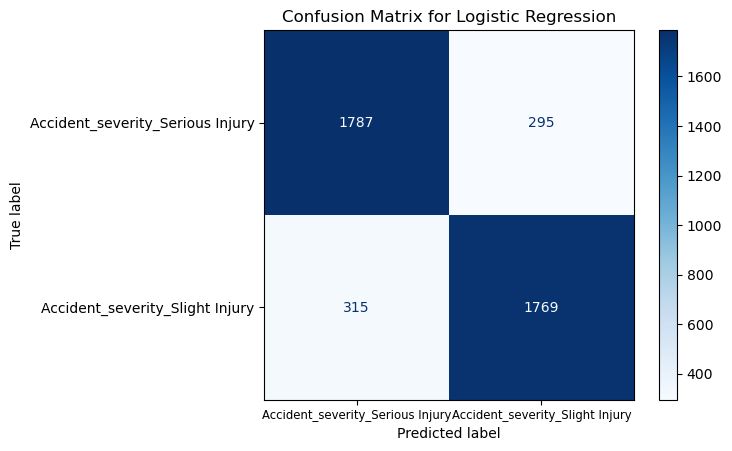

In [186]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_dec, display_labels=model_dec.classes_)

# Plotting the confusion matrix with a blue color map
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.xticks(fontsize=8.4)
plt.show()

# Decision Tree Classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier
model_dec=DecisionTreeClassifier(criterion='entropy')
model_dec.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [132]:
y_dec=model_dec.predict(X_test)
y_dec

array(['Accident_severity_Serious Injury',
       'Accident_severity_Slight Injury',
       'Accident_severity_Serious Injury', ...,
       'Accident_severity_Serious Injury',
       'Accident_severity_Slight Injury',
       'Accident_severity_Slight Injury'], dtype=object)

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

Confusion Matrix:
[[1787  295]
 [ 315 1769]] 



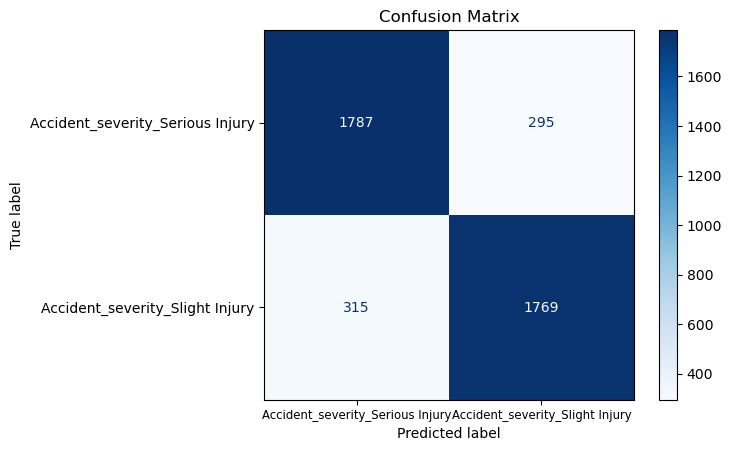

Accuracy Score: 0.8535765722515603 

Classification Report:
                                  precision    recall  f1-score   support

Accident_severity_Serious Injury       0.85      0.86      0.85      2082
 Accident_severity_Slight Injury       0.86      0.85      0.85      2084

                        accuracy                           0.85      4166
                       macro avg       0.85      0.85      0.85      4166
                    weighted avg       0.85      0.85      0.85      4166



In [204]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Compute confusion matrix
matrix_dec = confusion_matrix(y_test, y_dec)

# Print confusion matrix
print("Confusion Matrix:")
print(matrix_dec, '\n')

# Display confusion matrix with color
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_dec, display_labels=model_dec.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(fontsize=8.4)
plt.show()

# Compute accuracy
accuracy_dec = accuracy_score(y_test, y_dec)
print("Accuracy Score:", accuracy_dec, '\n')

# Print classification report
report_dec = classification_report(y_test, y_dec)
print("Classification Report:")
print(report_dec)


# Random Forest Classifier

Confusion Matrix:
[[1746  336]
 [  82 2002]] 

Confusion Matrix Displayed.
Accuracy: 0.899663946231397 

Classification Report:
                                  precision    recall  f1-score   support

Accident_severity_Serious Injury       0.96      0.84      0.89      2082
 Accident_severity_Slight Injury       0.86      0.96      0.91      2084

                        accuracy                           0.90      4166
                       macro avg       0.91      0.90      0.90      4166
                    weighted avg       0.91      0.90      0.90      4166



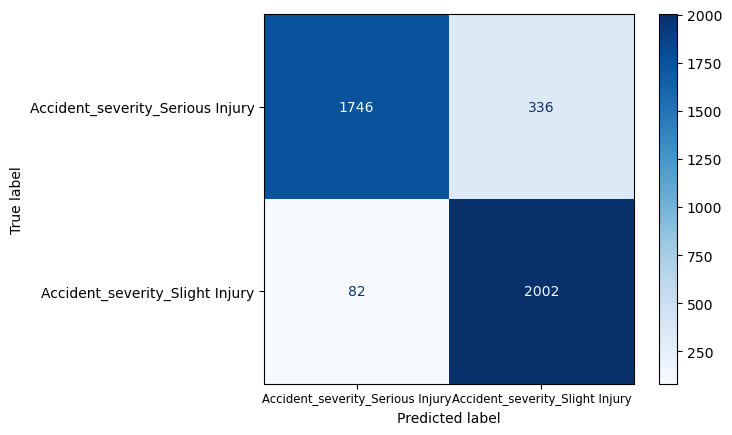

In [188]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = model_rf.predict(X_test)

# Compute the confusion matrix
matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix_rf, '\n')

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=matrix_rf, display_labels=model_rf.classes_)
disp_rf.plot(cmap='Blues')
plt.xticks(fontsize=8.4)
print("Confusion Matrix Displayed.")

# Compute and print the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf, '\n')

# Compute and print the classification report
report_rf = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_rf)

In [192]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

model=RandomForestClassifier()
params={"n_estimators" : [100,200],
        "criterion" : ["gini","entropy"]
        }
bestParams(model,params,X_train,y_train)

Best Parameters are  {'criterion': 'entropy', 'n_estimators': 200}
Best Accuracy is  0.9001835523679381


In [195]:
#retrain the model with best parameters
model=RandomForestClassifier(criterion="entropy",n_estimators=200)
model.fit(X_train,y_train)
ypred=model.predict(X_test)

Accuracy Score: 0.8997
Classification Report:
                                  precision    recall  f1-score   support

Accident_severity_Serious Injury       0.96      0.84      0.89      2082
 Accident_severity_Slight Injury       0.86      0.96      0.91      2084

                        accuracy                           0.90      4166
                       macro avg       0.91      0.90      0.90      4166
                    weighted avg       0.91      0.90      0.90      4166



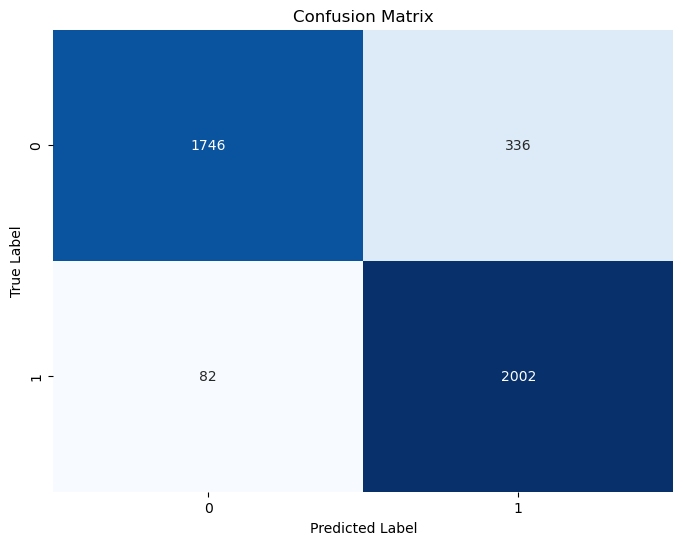

In [196]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix with Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()